<a href="https://colab.research.google.com/github/ruksz/AirbnbEDA/blob/main/Airbnb_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airbnb Data Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

Airbnb is more popular among guest and hosts as it offers people an easy, relatively stress-free solution as host can earn decent income by listing the property and guest often find them cheaper and more homier than hotels. 

This Airbnb dataset consists of rental listings of the 5 boroughs of most popular city in US, NYC : Brooklyn, Manhattan, Queens, Staten Island, Bronx. Each row represents a listing with details such as host id, host name, listing name, price per night, number of reviews, latitude & longitude, locality, area, and more.

# **GitHub Link -**

Provide your GitHub Link here.
[https://github.com/ruksz/AirbnbEDA](https://)

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [2]:
# Load Dataset
filePath ='/content/Airbnb NYC 2019.csv'
df = pd.read_csv(filePath)

airbnb_df=df.copy()

### Dataset First View

In [3]:
# Dataset First Look
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
airbnb_df.shape

(43427, 16)

### Dataset Information

In [5]:
# Dataset Info
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43427 entries, 0 to 43426
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43427 non-null  int64  
 1   name                            43411 non-null  object 
 2   host_id                         43426 non-null  float64
 3   host_name                       43405 non-null  object 
 4   neighbourhood_group             43426 non-null  object 
 5   neighbourhood                   43426 non-null  object 
 6   latitude                        43426 non-null  float64
 7   longitude                       43426 non-null  float64
 8   room_type                       43426 non-null  object 
 9   price                           43426 non-null  float64
 10  minimum_nights                  43426 non-null  float64
 11  number_of_reviews               43426 non-null  float64
 12  last_review                     

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(airbnb_df[airbnb_df.duplicated()])

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print(airbnb_df.isnull().sum())

id                                   0
name                                16
host_id                              1
host_name                           22
neighbourhood_group                  1
neighbourhood                        1
latitude                             1
longitude                            1
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       7374
reviews_per_month                 7374
calculated_host_listings_count       1
availability_365                     1
dtype: int64


In [8]:
# Dropping last_review and reviews_per_month column as it contains more than 10052 null values
airbnb_df.drop(['last_review', 'reviews_per_month'], axis=1)
#airbnb_df.drop(['last_review', 'reviews_per_month'], axis=1, inplace="true")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43422,33643819,"Premier room in Downtown NY, Two Bridges,China...",253552326.0,Grace,Manhattan,Chinatown,40.71313,-73.99615,Private room,108.0,1.0,11.0,4.0,175.0
43423,33644836,"Priv room in an immaculate Apt,near Cent Park,...",76628403.0,Matt,Manhattan,Upper West Side,40.77961,-73.97821,Private room,160.0,2.0,3.0,1.0,61.0
43424,33645301,1718公馆套房,119692067.0,Qiulan,Brooklyn,Sunset Park,40.64403,-74.00087,Private room,60.0,1.0,0.0,3.0,89.0
43425,33645723,Cute private room in Washington Heights!,112531390.0,Rachel,Manhattan,Washington Heights,40.84427,-73.93742,Private room,52.0,1.0,1.0,1.0,0.0


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
list(airbnb_df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [10]:
# Dataset Describe
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.342700e+04,4.342600e+04,43426.000000,43426.000000,43426.000000,43426.000000,43426.000000,36053.000000,43426.000000,43426.000000
mean,1.699204e+07,5.707059e+07,40.728723,-73.952508,149.571777,7.026136,25.957951,1.281800,6.312762,106.566159
std,9.953051e+06,6.782592e+07,0.054399,0.045207,237.780407,20.968537,46.572629,1.624674,28.468985,130.337427
min,2.539000e+03,2.438000e+03,40.499790,-74.242850,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.369551e+06,6.948271e+06,40.689600,-73.982680,69.000000,1.000000,1.000000,0.170000,1.000000,0.000000
50%,1.745693e+07,2.591267e+07,40.722470,-73.955650,105.000000,3.000000,7.000000,0.610000,1.000000,32.000000
75%,2.553793e+07,8.414183e+07,40.763220,-73.937170,175.000000,5.000000,28.000000,1.900000,2.000000,213.000000
max,3.365078e+07,2.575691e+08,40.911690,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in airbnb_df.columns:
  print("Unique values in ",i,":",airbnb_df[i].nunique())

Unique values in  id : 43427
Unique values in  name : 42575
Unique values in  host_id : 33746
Unique values in  host_name : 10437
Unique values in  neighbourhood_group : 5
Unique values in  neighbourhood : 221
Unique values in  latitude : 18184
Unique values in  longitude : 13885
Unique values in  room_type : 3
Unique values in  price : 641
Unique values in  minimum_nights : 106
Unique values in  number_of_reviews : 394
Unique values in  last_review : 1764
Unique values in  reviews_per_month : 912
Unique values in  calculated_host_listings_count : 47
Unique values in  availability_365 : 366


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
print(airbnb_df['neighbourhood_group'].unique())
# Getting Unique neighbourhood and neighbourhood_groups Count
print("Total", airbnb_df['neighbourhood_group'].nunique(),"unique districts(boroughs), and ", airbnb_df['neighbourhood'].nunique() , "areas." )

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx' nan]
Total 5 unique districts(boroughs), and  221 areas.


In [170]:
neighbourhood_group_count = airbnb_df.groupby(['neighbourhood_group']).count()
neighbourhood_group_count

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
neighbourhood_group,,,,,,,,,,,,,,,,
Bronx,903,902,903,902,903,903,903,903,903,903,903,782,782,903,903,903
Brooklyn,18275,18269,18275,18266,18275,18275,18275,18275,18275,18275,18275,15471,15471,18275,18275,18275
Manhattan,19095,19086,19095,19086,19095,19095,19095,19095,19095,19095,19095,15379,15379,19095,19095,19095
Queens,4829,4829,4829,4827,4829,4829,4829,4829,4829,4829,4829,4135,4135,4829,4829,4829
Staten Island,324,324,324,324,324,324,324,324,324,324,324,286,286,324,324,324


In [13]:
#1. Finding the total host_listings for each boroughs and visulaised through bargraph
popular_group= airbnb_df.groupby(['neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index().sort_values(by='calculated_host_listings_count', ascending=False).head(5)
print(popular_group)

  neighbourhood_group  calculated_host_listings_count
2           Manhattan                        211027.0
1            Brooklyn                         41392.0
3              Queens                         19006.0
0               Bronx                          1936.0
4       Staten Island                           777.0


In [135]:
area_wise_max_cost = airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].max().reset_index().sort_values(by='price', ascending=False)
print(area_wise_max_cost)

   neighbourhood_group        room_type    price
3             Brooklyn  Entire home/apt  10000.0
6            Manhattan  Entire home/apt  10000.0
10              Queens     Private room  10000.0
7            Manhattan     Private room   9999.0
4             Brooklyn     Private room   5000.0
12       Staten Island  Entire home/apt   5000.0
9               Queens  Entire home/apt   2600.0
1                Bronx     Private room   2500.0
11              Queens      Shared room   1800.0
8            Manhattan      Shared room   1000.0
2                Bronx      Shared room    800.0
5             Brooklyn      Shared room    725.0
0                Bronx  Entire home/apt    670.0
13       Staten Island     Private room    300.0
14       Staten Island      Shared room    150.0


<AxesSubplot:xlabel='price', ylabel='neighbourhood_group'>

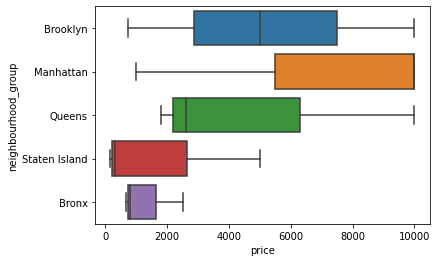

In [140]:
sns.boxplot(data=area_wise_max_cost, x="price", y="neighbourhood_group", dodge=False)

In [81]:
#2 .Price sorted according to number of reviews of the lisiting and further visulaised as a scatterplot for the business insights
price_area = airbnb_df.groupby(['price'])['number_of_reviews'].max().reset_index().sort_values(by='number_of_reviews', ascending=False)
print(price_area)

      price  number_of_reviews
35     47.0              629.0
37     49.0              607.0
34     46.0              543.0
87     99.0              540.0
36     48.0              510.0
..      ...                ...
304   317.0                0.0
580  1550.0                0.0
533   913.0                0.0
389   423.0                0.0
356   382.0                0.0

[641 rows x 2 columns]


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<AxesSubplot:title={'center':'Location Popularity'}, xlabel='neighbourhood_group'>

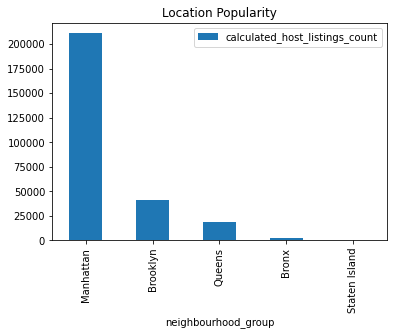

In [15]:
# Chart - 1 visualization code
popular_group.plot(x="neighbourhood_group", y="calculated_host_listings_count", kind="bar" , title = "Location Popularity")

From the above bar graph it's clear that the Manhattan is the most desired borough in NYC among all and it contains the maximum host listings of 277073 in total. Whereas, Staten Island has only 865 host listings which makes the it to the least.

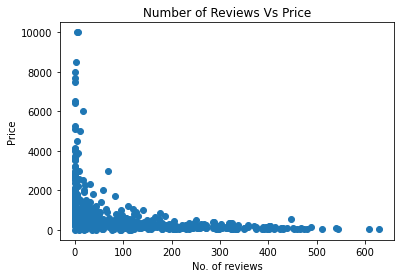

In [89]:
# Chart - 2 visualization code
price = price_area['price']
no_of_reviews = price_area['number_of_reviews']

# creating the bar plot
plt.scatter(no_of_reviews,price)
 
plt.xlabel("No. of reviews")
plt.ylabel("Price")
plt.title("Number of Reviews Vs Price")
plt.show()

We can say this the main focus of the research, as we can clearly see that the maximum revenue is generated from the properties where the price is lower and maximum reviews are on the same.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [16]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [17]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [18]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [19]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [20]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [21]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [22]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [23]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [24]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [25]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [26]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [27]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [28]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [29]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***